In [1]:
import numpy as np
import pandas as pd

In [2]:
import datetime
from datetime import datetime, date

In [3]:
pd.set_option('display.notebook_repr_html', True)
pd.set_option('display.max_columns',8)
pd.set_option('display.max_rows',10)
pd.set_option('display.width', 100)


In [4]:
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns

from bokeh.plotting import figure, output_file, show
from bokeh.models import ColumnDataSource

In [5]:
df = pd.read_excel('database.xlsx')
print(df.head(5))
print()
print(df.tail(5))
print()
print(df.shape)
print()
print(df.dtypes)

        date manager region product  amount  sale    val
0 2018-01-01      m1     r1     pr1      39   241   9399
1 2018-01-02      m2     r2     pr2      67   345  23115
2 2018-01-03      m3     r1     pr3      74   471  34854
3 2018-01-04      m4     r2     pr1      29   170   4930
4 2018-01-05      m1     r1     pr2      80   444  35520

         date manager region product  amount  sale    val
43 2018-02-13      m4     r2     pr3      70   458  32060
44 2018-02-14      m1     r1     pr1      97   425  41225
45 2018-02-15      m2     r2     pr2      24   140   3360
46 2018-02-16      m3     r1     pr3      30   482  14460
47 2018-02-17      m4     r2     pr1      32   490  15680

(48, 7)

date       datetime64[ns]
manager            object
region             object
product            object
amount              int64
sale                int64
val                 int64
dtype: object


In [6]:
df_new = df.set_index(['date'])

In [7]:
df_new

,manager,region,product,amount,sale,val
date,,,,,,
2018-01-01,m1,r1,pr1,39,241,9399
2018-01-02,m2,r2,pr2,67,345,23115
2018-01-03,m3,r1,pr3,74,471,34854
2018-01-04,m4,r2,pr1,29,170,4930
2018-01-05,m1,r1,pr2,80,444,35520
...,...,...,...,...,...,...
2018-02-13,m4,r2,pr3,70,458,32060
2018-02-14,m1,r1,pr1,97,425,41225
2018-02-15,m2,r2,pr2,24,140,3360


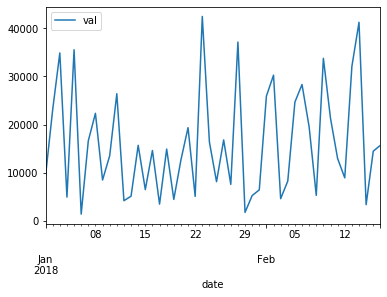

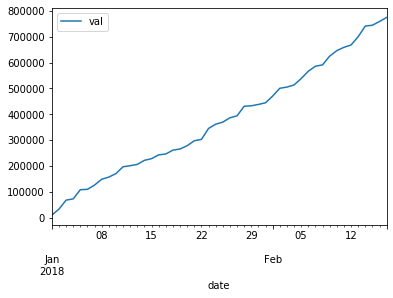

In [8]:
df1 = df_new[['val']]
df1.plot()
df1.cumsum().plot()

Text(0, 0.5, 'сумма')

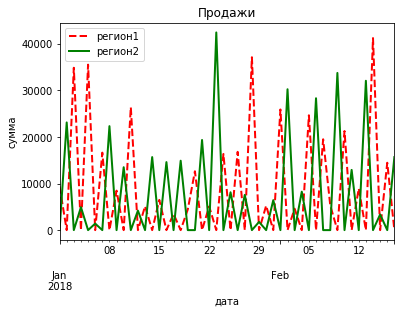

In [9]:
df2 = df_new[['region','val']].pivot(columns='region',values='val').fillna(0)
ax2 = df2.plot(title = 'Продажи', style =['r--','g'], lw=2)
ax2.legend(['регион1','регион2'], loc='best')
plt.xlabel('дата')
plt.ylabel('сумма')

Text(0.5, 1.0, 'Продажи')

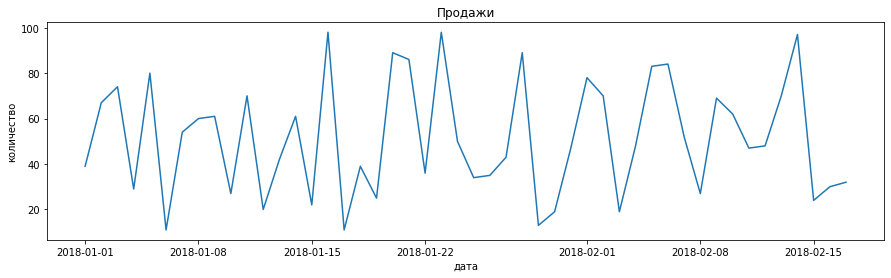

In [10]:
fig, axes3 = plt.subplots(figsize=(15,4))
axes3.plot(df_new[['amount']])
axes3.set_xlabel('дата')
axes3.set_ylabel('количество')
axes3.set_title('Продажи')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000000178262AC8>]],
      dtype=object)

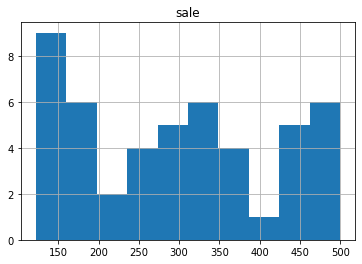

In [11]:
df4 = df_new[['sale']]
df4.hist()

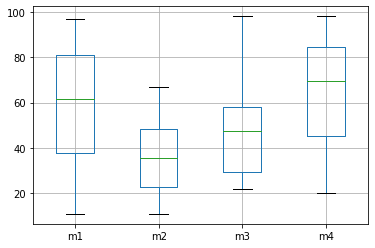

In [12]:
df5 = df_new[['manager','amount']].pivot(columns='manager',values='amount').fillna(df_new[['amount']].median())
df5.boxplot()

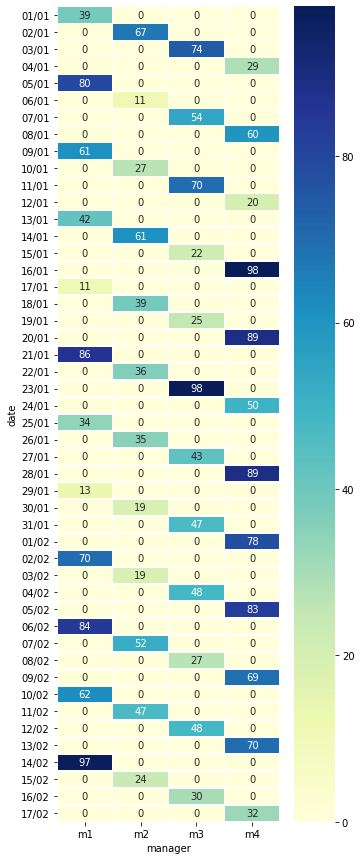

In [13]:
df6 = df_new[['manager','amount']].pivot(columns='manager',values='amount').fillna(0)
df6_date=df['date'].apply(lambda x: x.strftime("%d/%m"))
fig, axes6 = plt.subplots(figsize=(5, 15))
sns.heatmap(df6, annot=True,  ax=axes6, yticklabels=df6_date, linewidths=.5, cmap="YlGnBu")

In [32]:
df7 = df[['val']].values.tolist()
output_file("vbar.html")
p = figure(x_range=df6_date, title="Продажи", plot_width=1000, plot_height=250, background_fill_color="#fafafa",toolbar_location=None, tools="")
p.vbar(x=df6_date, top=df7, width=0.8, color="navy")
p.xaxis.major_label_orientation = 1.6
p.xgrid.grid_line_color = None
show(p)
